In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\user\\OneDrive\\Desktop\\Development-Journey\\pandas-works\\customer-behavior\\customer_behavior_casestudy.csv")
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [2]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [3]:
df.shape

(350, 11)

In [4]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [4]:
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Age":"age",'City':'city', 'Membership Type':'membership_type',
       'Total Spend':'total_spend', 'Items Purchased':'items_purchased', 'Average Rating':'average_rating', 'Discount Applied':'discount_applied',
       'Days Since Last Purchase':'days_since_last_purchase', 'Satisfaction Level':'satisfaction_level'},inplace=True)

In [ ]:
df.head()

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [6]:
condition= df["average_rating"].apply(lambda x: "Unsatisfied" if x<3.5 else "Neutral" if x>3.5 and x<4.0 else "Satisfied"  )
df["satisfaction_level"].fillna(condition ,inplace=True)

In [7]:
df[df["customer_id"]==172]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,Unsatisfied


In [5]:
df["gender"].value_counts()

gender
Female    175
Male      175
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

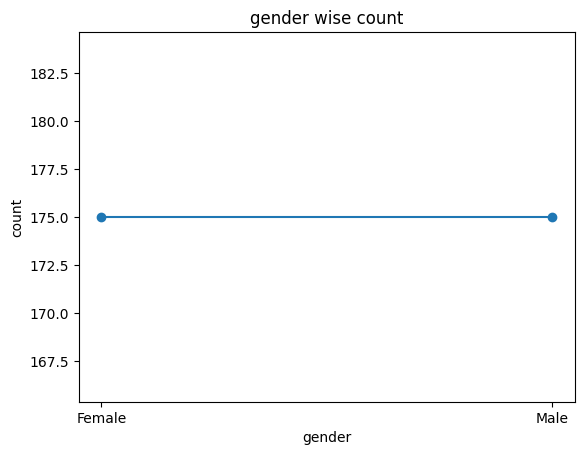

In [12]:
gender_count=df["gender"].value_counts()
plt.plot(gender_count,marker="o")
plt.title("gender wise count")
plt.xlabel("gender")
plt.ylabel("count")


In [14]:
#customer average age
df["age"].mean().__round__()

34

In [17]:
# unique membership
df["membership_type"].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [ ]:
customers=df["membership_type"].value_counts()

In [19]:
membership=df["membership_type"].unique()

Text(0.5, 1.0, 'membership wise count')

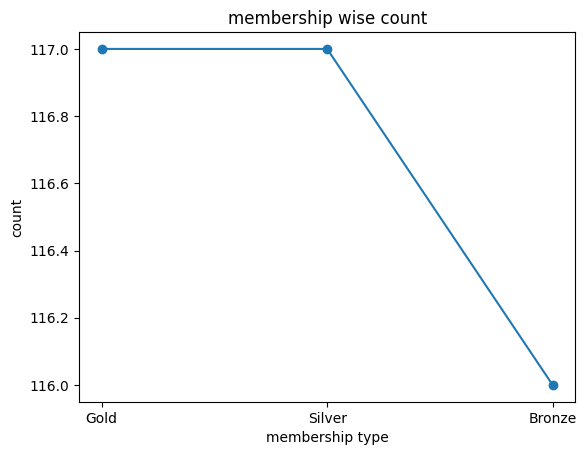

In [23]:
plt.plot(membership,customers,marker="o")
plt.xlabel("membership type")
plt.ylabel("count")
plt.title("membership wise count")

In [27]:
# membership wise total spend sum
membership_total_spend=df.groupby("membership_type")["total_spend"].sum()
membership_total_spend

membership_type
Bronze     54913.1
Gold      153403.9
Silver     87566.6
Name: total_spend, dtype: float64

Text(0.5, 1.0, 'membership wise chart')

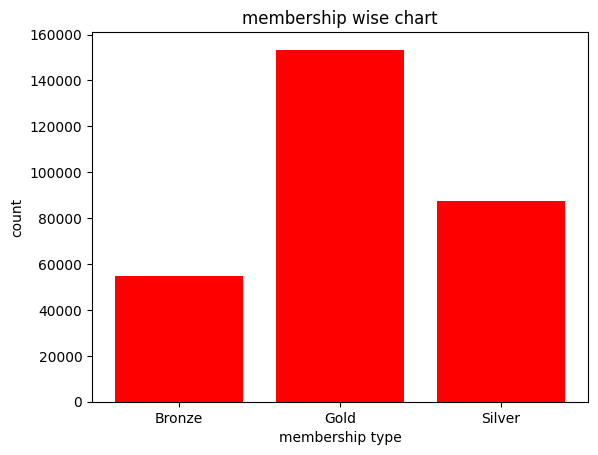

In [31]:
plt.bar(membership_total_spend.index,membership_total_spend.values,color="red")
plt.xlabel("membership type")
plt.ylabel("count")
plt.title("membership wise chart")

In [35]:
# gold members details
df[df["membership_type"]=="Gold"]


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,Satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,Satisfied


In [36]:
#rating above 4.5
df[df["average_rating"]>4.5]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,Satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,Satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,Satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,Satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,Satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,Satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,Satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,Satisfied


In [39]:
# customers per city [plot]

customers_per_city=df["city"].value_counts()
customers_per_city

city
New York         59
Los Angeles      59
Chicago          58
San Francisco    58
Miami            58
Houston          58
Name: count, dtype: int64

<BarContainer object of 6 artists>

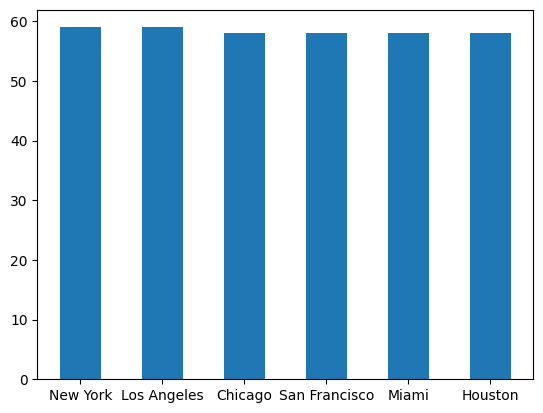

In [46]:
plt.bar(customers_per_city.index,customers_per_city.values,width=.5)

In [41]:
# city wise total spend[plot]
city_wise_total_spend=df.groupby("city")["total_spend"].sum()
city_wise_total_spend

city
Chicago          28993.2
Houston          25919.9
Los Angeles      47524.0
Miami            40042.6
New York         68737.1
San Francisco    84666.8
Name: total_spend, dtype: float64

Text(0.5, 0, 'city')

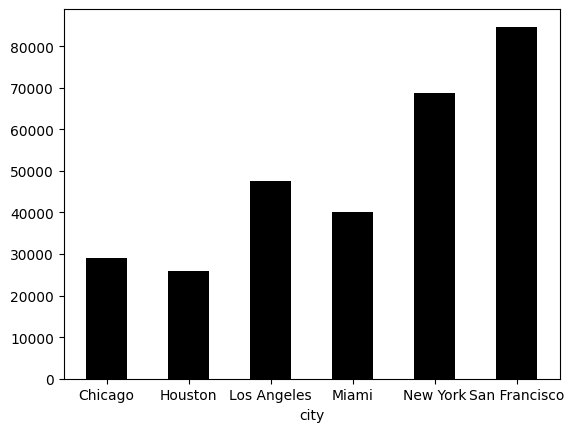

In [50]:
plt.bar(city_wise_total_spend.index,city_wise_total_spend.values,color="black",width=.5)
plt.xlabel("city")

([<matplotlib.patches.Wedge at 0x22b4c3182d0>,
 [Text(1.0482892953801437, 0.3333009948851073, 'Chicago'),
  Text(0.6915931686830732, 0.8553939963729618, 'Houston'),
  Text(-0.10970201354560376, 1.094516088609044, 'Los Angeles'),
  Text(-0.9428293511093423, 0.5666328746964271, 'Miami'),
  Text(-0.8991876248554197, -0.633609986748054, 'New York'),
  Text(0.684663489670123, -0.860950582735577, 'San Francisco')],
 [Text(0.5717941611164419, 0.18180054266460394, '9.8%'),
  Text(0.3772326374634944, 0.4665785434761609, '8.8%'),
  Text(-0.05983746193396568, 0.5970087756049329, '16.1%'),
  Text(-0.5142705551505503, 0.309072477107142, '13.5%'),
  Text(-0.49046597719386525, -0.34560544731712034, '23.2%'),
  Text(0.3734528125473398, -0.4696094087648601, '28.6%')])

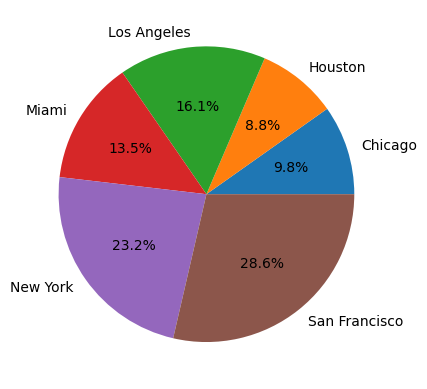

In [57]:
plt.pie(city_wise_total_spend,labels=city_wise_total_spend.index,autopct='%1.1f%%')

In [54]:
# city wise average rate
city_wise_average_rate=df.groupby("city")["average_rating"].mean()
city_wise_average_rate

city
Chicago          3.456897
Houston          3.193103
Los Angeles      4.172881
Miami            3.927586
New York         4.544068
San Francisco    4.808621
Name: average_rating, dtype: float64

Text(0.5, 1.0, 'city_wise_average_rate')

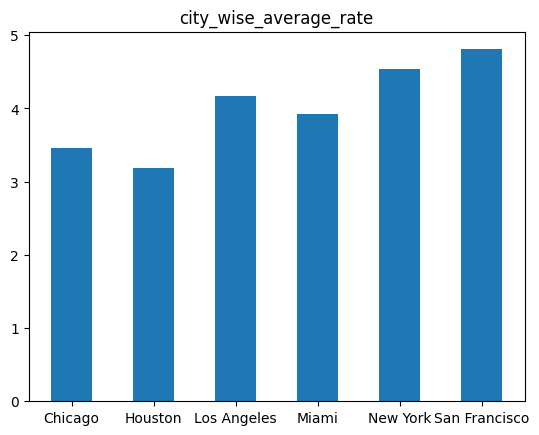

In [56]:
plt.bar(city_wise_average_rate.index,city_wise_average_rate.values,width=.5)
plt.title("city_wise_average_rate")